## Árboles de decisión en Python

A continuación veremos cómo podemos implementar este modelo en Python. Para ello, utilizaremos la librería `scikit-learn`.

### Árboles de decisión para clasificación

Para ejemplificar la implementación de un árbol de clasificación utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

#### Paso 1. Lectura del conjunto de datos procesado

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


El conjunto *train* lo utilizaremos para entrenar el modelo, mientras que con el *test* lo evaluaremos para medir su grado de efectividad. Además, no es necesario que las variables predictoras estén normalizadas, ya que los árboles de decisión no se ven afectados por la escala de los datos debido a la forma en la que funcionan: toman decisiones basadas en ciertos umbrales de características, independientemente de su escala.

Una forma de visualizar la relación de las variables con el objetivo es utilizando un nuevo tipo de gráfico, el `parallel_coordinates`. Es una técnica de visualización de datos que se utiliza para trazar variables numéricas multivariadas:

<Axes: >

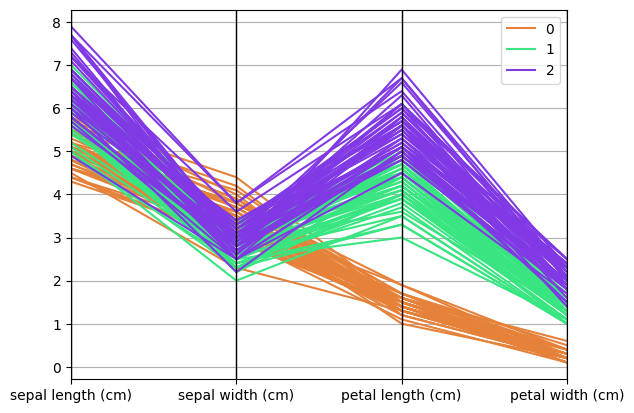

In [5]:
import pandas as pd

total_data = X
total_data["Name"] = y

pd.plotting.parallel_coordinates(total_data, "Name", color = ("#E58139", "#39E581", "#8139E5"))

Siendo la clase `0` una `iris setosa`, la `1` una `iris versicolor` y la `2` una `iris virginica`, podemos apreciar cómo se reparten los valores de las predictoras en las distintas clases de flor. Este puede ser un buen gráfico a incluir en nuestros análisis EDA a partir de ahora, ya que nos ayuda a identificar patrones y correlaciones entre las variables.

#### Paso 2: Inicialización y entrenamiento del modelo

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Una vez que el modelo se ha entrenado correctamente, podemos visualizar el árbol con la misma librería. Esta visualización representa todos los pasos que ha seguido el modelo hasta la construcción del árbol. Además, se hace por niveles y de izquierda a derecha:

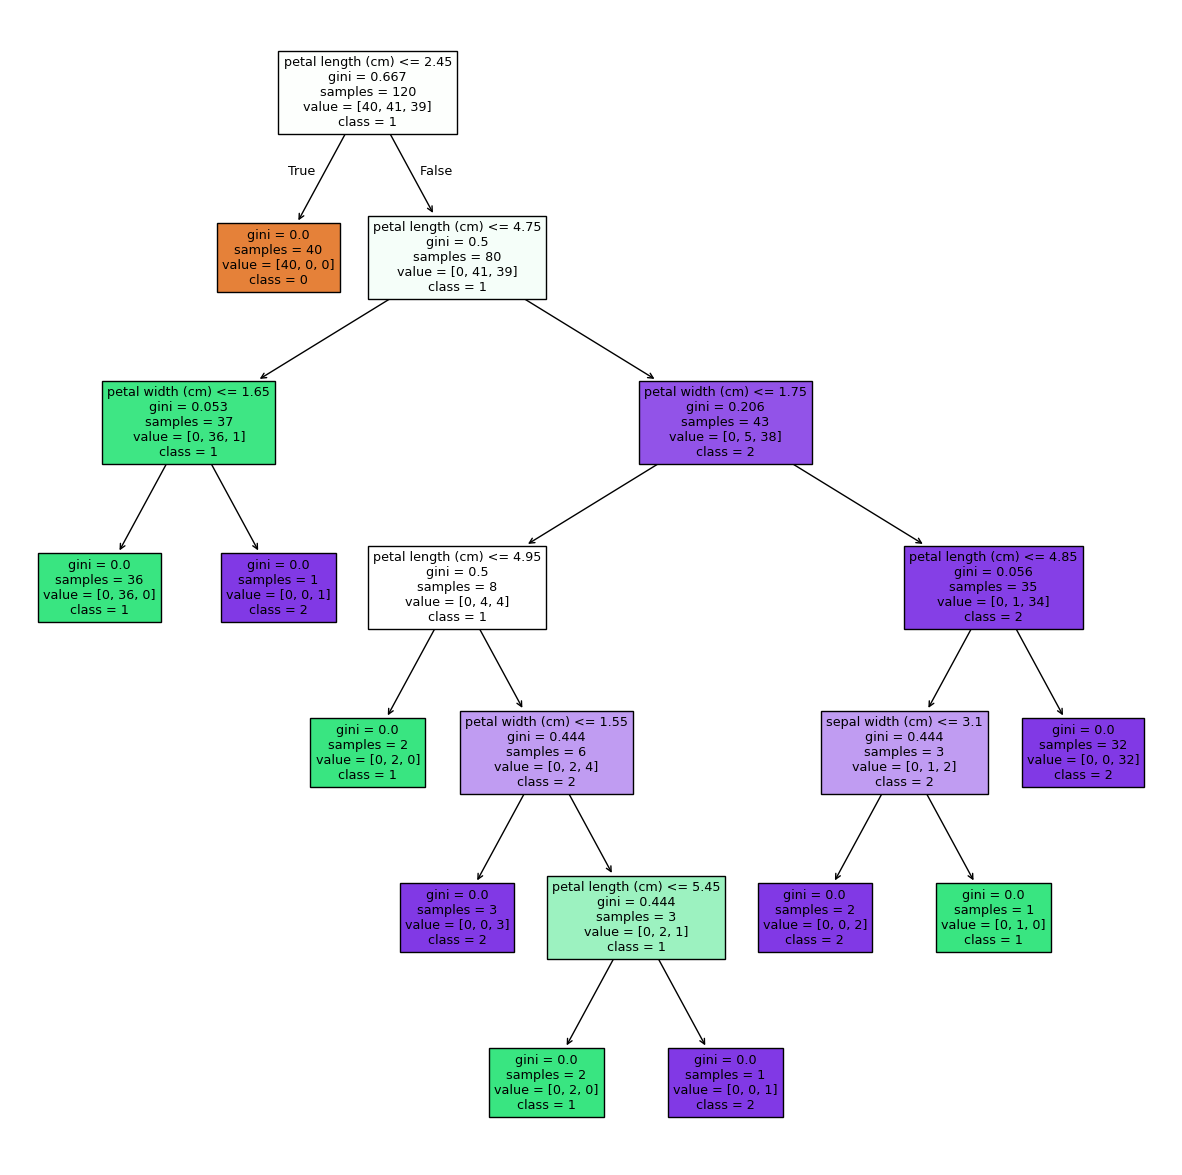

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la tipología de modelo y su configuración.

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [8]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

¡El modelo es perfecto!

#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio, junto a la semilla.

In [11]:
from pickle import dump

dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos, por un lado, qué configuración tiene (en este caso ponemos `default` porque no hemos personalizado ninguno de los hiperparámetros del modelo, hemos dejado los que tiene por defecto la función) y además la semilla para replicar los componentes aleatorios del modelo, que en este caso lo hacemos añadiendo un número al nombre del archivo, el `42`.

### Árboles de decisión para regresión

Para ejemplificar la implementación de un árbol de regresión utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

#### Paso 1. Lectura del conjunto de datos procesado

In [12]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv")

train_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,8.0,4447,8577,0.529,464
1,7.5,4870,2351,0.529,414
2,8.0,5319,11868,0.451,344
3,7.0,4345,3905,0.672,968
4,7.5,3357,4121,0.547,628


El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.

In [13]:
X_train = train_data.drop(["Petrol_Consumption"], axis = 1)
y_train = train_data["Petrol_Consumption"]
X_test = test_data.drop(["Petrol_Consumption"], axis = 1)
y_test = test_data["Petrol_Consumption"]

#### Paso 2: Inicialización y entrenamiento del modelo

In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [15]:
y_pred = model.predict(X_test)
y_pred

array([603., 632., 580., 714., 510., 644., 414., 968., 580., 541.])

Para calcular la efectividad del modelo utilizaremos el **error cuadrático medio** (*MSE*):

In [16]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 17347.7


In [17]:
import numpy as np

print(f"Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Raíz del error cuadrático medio: 131.7106677532234


In [18]:
from sklearn.metrics import r2_score

print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Coeficiente de determinación: -1.585777975194108


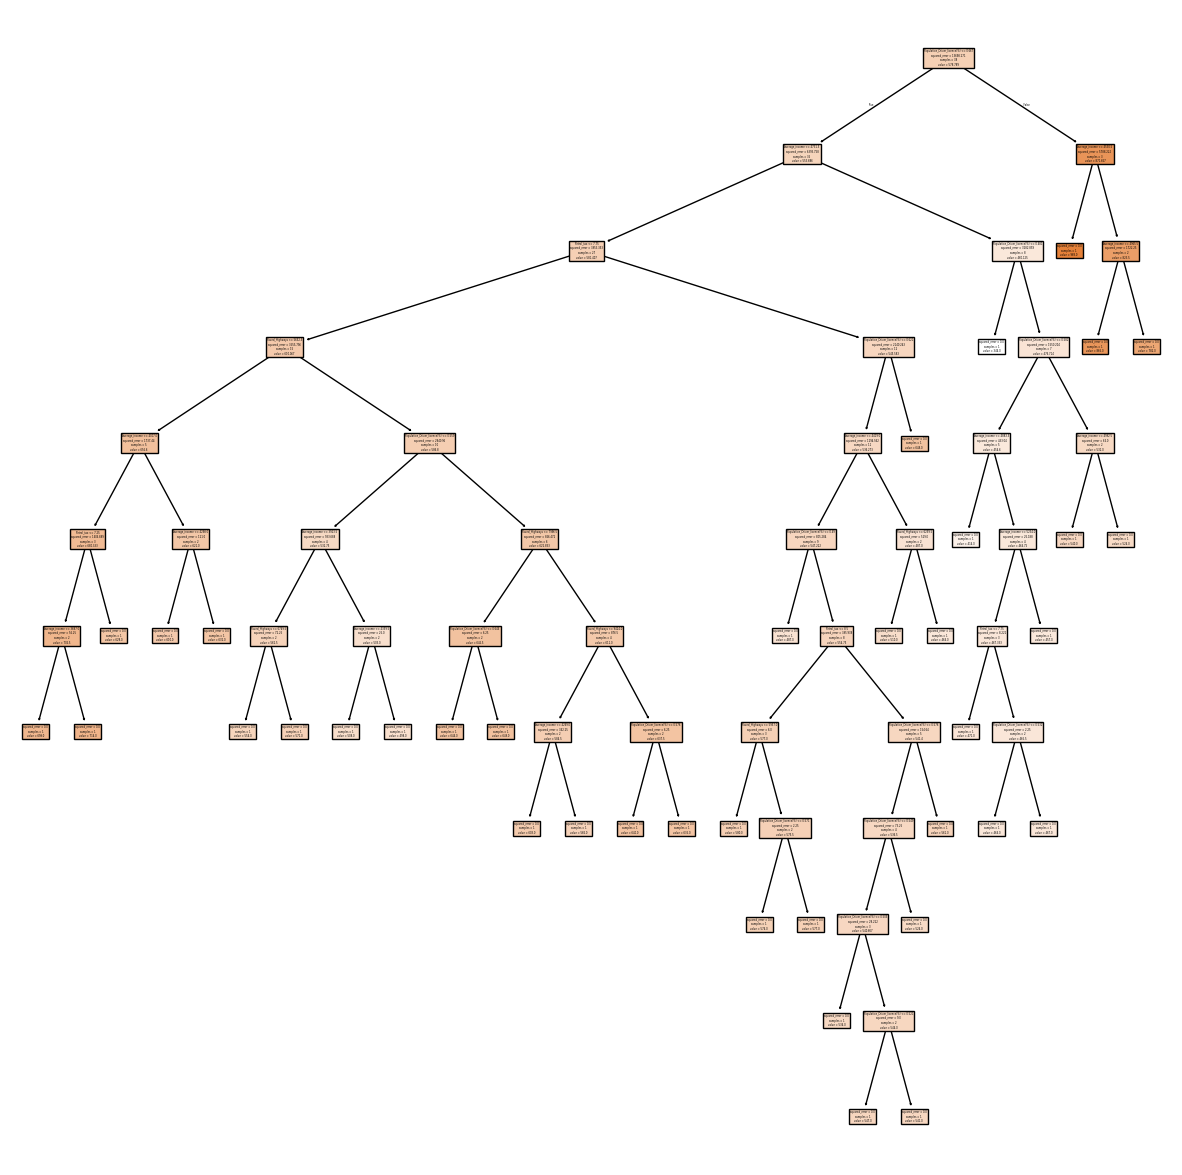

In [21]:
# Visual

plt.figure(figsize = (15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), filled = True)
plt.show()

#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio, junto a la semilla.

In [ ]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos, por un lado, qué configuración tiene (en este caso ponemos `default` porque no hemos personalizado ninguno de los hiperparámetros del modelo, hemos dejado los que tiene por defecto la función) y además la semilla para replicar los componentes aleatorios del modelo, que en este caso lo hacemos añadiendo un número al nombre del archivo, el `42`.